In [3]:
import pandas as pd
import os

# Data load karke columns check karte hain
file_path = r'C:\Users\PAWAN PRASAD\OneDrive\Desktop\smartphone vfm\smartphone-value-for-money-predictor\data\raw\smartphones.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Data load successful.")
    print("-" * 30)
    print("Columns of the given dataset : ")
    print(df.columns.tolist())
else:
    print("Error: File not found.")

Data load successful.
------------------------------
Columns of the given dataset : 
['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free', 'Final Price']


In [4]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [6]:
df.shape

(1816, 8)

In [7]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [8]:
df['RAM']

0        8.0
1        4.0
2        4.0
3        6.0
4       12.0
        ... 
1811     4.0
1812     4.0
1813     4.0
1814     4.0
1815     6.0
Name: RAM, Length: 1816, dtype: float64

In [9]:
df['Storage']

0       256.0
1       128.0
2       128.0
3       128.0
4       512.0
        ...  
1811     64.0
1812    128.0
1813    128.0
1814     64.0
1815    128.0
Name: Storage, Length: 1816, dtype: float64

In [11]:
df['RAM'].value_counts()

RAM
8.0     381
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


<Axes: xlabel='Final Price', ylabel='Count'>

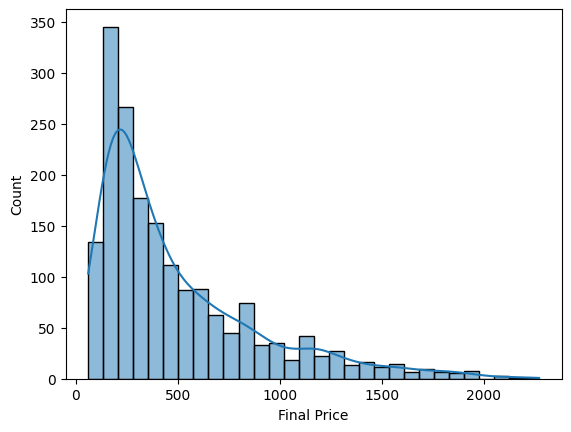

In [14]:
import seaborn as sns
sns.histplot(df['Final Price'], kde=True)

<Axes: xlabel='Brand'>

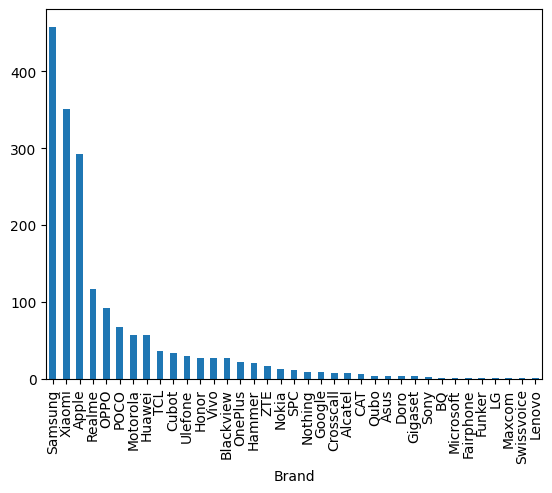

In [18]:
df['Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Final Price'>

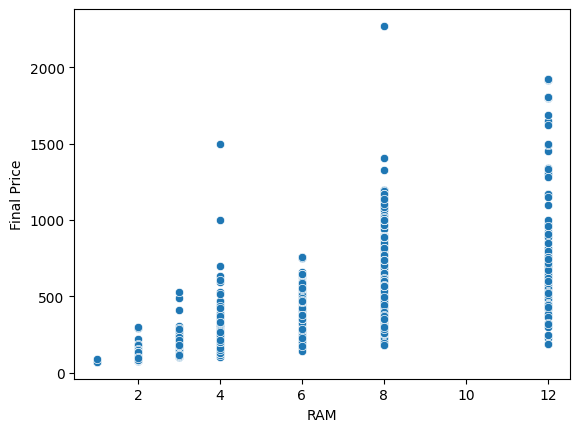

In [19]:
sns.scatterplot(x='RAM', y='Final Price', data=df)

<Axes: >

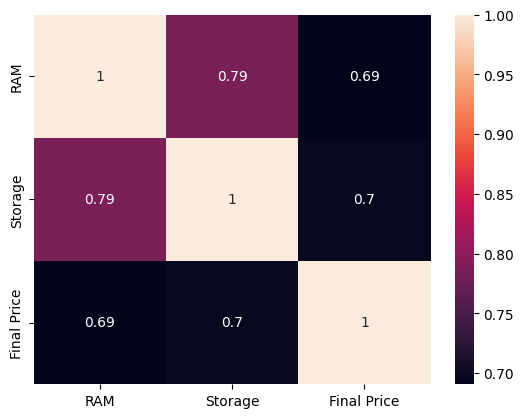

In [20]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)

In [24]:
import matplotlib.pyplot as plt

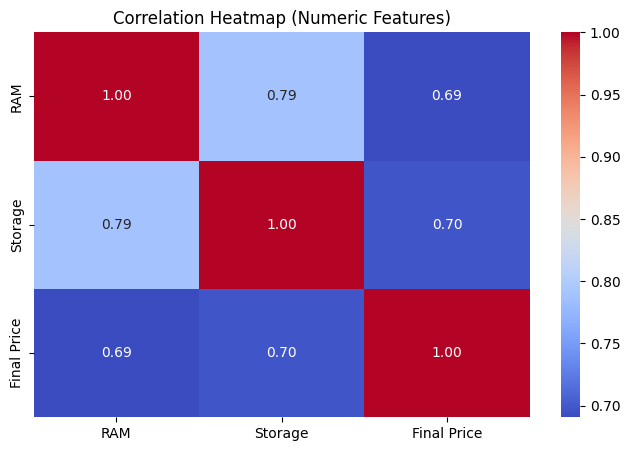

In [26]:
# Sirf numeric columns ka correlation nikalna hai
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [31]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,Others,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Others,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Others,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Others,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [42]:
# 1. Categorical Features (Brand, Model, Color, Free)
cat_features = ['Brand', 'Model', 'Color', 'Free']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output = False))
])

In [44]:
# 2. Numerical Features (RAM, Storage)
num_features = ['RAM','Storage']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())])

In [45]:
# 3. Combine both using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [46]:
# 4. Create the final ML Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])   

In [47]:
from sklearn.model_selection import train_test_split

# Smartphone aur Model (jo original wala tha) drop kar do
X = df.drop(['Final Price', 'Smartphone'], axis=1) 
y = df['Final Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Models ki list
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# 2. Results store karne ke liye list
results = []

for name, model in models.items():
    # Pipeline banao
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train karo
    pipeline.fit(X_train, y_train)
    
    # Predict karo
    y_pred = pipeline.predict(X_test)
    
    # Metrics calculate karo
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # List mein append karo
    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

# 3. List ko sundar DataFrame mein badlo
results_df = pd.DataFrame(results)
print(results_df)

               Model  R2 Score         MAE        RMSE
0  Linear Regression  0.701124  169.947694  237.235836
1      Random Forest  0.749250  143.000472  217.298008
2      Decision Tree  0.718770  150.138068  230.126083


In [52]:
# Random Forest wala best pipeline finalize karo
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
])

# Poore dataset par ya X_train par fit karo
final_pipeline.fit(X_train, y_train)
                        

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
# Model save karo
import joblib

# final_pipeline wo hai jisme preprocessor aur RandomForest dono ek saath hain
joblib.dump(final_pipeline, 'smartphone_model.pkl')

print("Mubarak ho! Model 'joblib' ke zariye save ho gaya.")

Mubarak ho! Model 'joblib' ke zariye save ho gaya.


In [54]:
#(HUMNE BASS MODEL KO SAVE KIYA KYA ITNE SE HI STREAMLIT COLUD RUN HOJYEGA WOR INPUT YA FIR SCALER YE SAB NAHI CHIYE KYA)?
#-->Jab humne model_pipeline banaya tha, toh usme humne preprocessor (Scaler + Encoder) aur regressor (Random Forest) ko ek saath baandh (bind) diya tha.